# El sistema astronómico de magnitudes y colores

**Objetivos:** 
* Calcular la longitud de onda efectiva y equivalente, teniendo en cuenta la sensibilidad de un determinado filtro y el flujo emitido por una determinada fuente.
* Graficar la sensibilidad de un sistema de filtros.
* Calcular los colores instrumentales a partir de una fuente de energía.

In [1]:
import pandas as pd
data = pd.read_csv('UBVRI.dat', sep=" ", comment = '#', header=None)
data # Se accede a cada columna mediante: data[0], data[1], ...

,0,1,2,3
0,B,3600,0.00,0.00
1,B,3650,0.00,0.00
2,B,3700,0.02,0.02
3,B,3750,0.05,0.05
4,B,3800,0.11,0.11
...,...,...,...,...
304,V,7150,0.01,0.01
305,V,7200,0.01,0.01
306,V,7250,0.01,0.01
307,V,7300,0.01,0.01


In [2]:
## 1)
##
from scipy.integrate import simps
import numpy as np

from astropy.modeling.models import BlackBody
from astropy import units as u

dataU = data[data[0] == 'U'] # Filtro por banda.
dataB = data[data[0] == 'B'] # Filtro por banda.
dataV = data[data[0] == 'V'] # Filtro por banda.
#print(dataV[0]) % Sirve para comprobar si el filtrado funciono bien.

LOE_numerador = simps(dataV[1]*dataV[2], x=dataV[1])
LOE_denominador = simps(dataV[2], x=dataV[1])

print ("Long. de onda media [\AA] = ", LOE_numerador/LOE_denominador)

bb = BlackBody(temperature=6000*u.K)
LOEQ_numerador = simps(dataV[1]*dataV[2]*bb(dataV[1]), x=dataV[1])
LOEQ_denominador = simps(dataV[2]*bb(dataV[1]), x=dataV[1])

print ("Long. de onda equivalente [\AA] = ", LOEQ_numerador/LOEQ_denominador)
# Que paso con el diferencial de long. de onda?


Long. de onda media [\AA] =  5535.781242639785
Long. de onda equivalente [\AA] =  5588.277416787293


In [3]:
## 2)
##
distribucion = pd.read_csv("distribucion_espectral_K5V.dat", sep = " ", comment = '#', header = None)
distribucion[0] = distribucion[0] * 10. # Para convertir la long. de onda de nm a AA.
# Hay alguna forma de hacer la conversion de unidades usando astropy?
#print(distribucion)


# Calculo la magnitud en el filtro V:
## 2.1) Filtro la distribución de la fuente según la long. de onda
##       disponible en el archivo de sensibilidades.
min = dataV[1].min() # Calculo el minimo y máximo
max = dataV[1].max() #  de las long. de onda.
print ("[*] min y máx de la long. de onda (V) = ", min, max)

dist_filtrada = distribucion[(distribucion[0] >= min) & (distribucion[0] <= max)] # Filtro por banda.
##      Notar: el espaciado en de la sensibilidad y de la distribucion es la misma (50 AA),
##             por lo que no hay que hacer ninguna interpolación.
#print (dist_filtrada)
#print (dataV)

#print (len(dist_filtrada), len(dataV)) # Tamaño de cada matriz.

dataV = dataV.reset_index(drop=True) # Vuelve a cero los indices.
dist_filtrada = dist_filtrada.reset_index(drop=True)

# if coinciden los len:
output = dist_filtrada.join(dataV, lsuffix='_caller', rsuffix='_other')
#print(output)

V = -2.5 * np.log10( simps(output['1_caller']*output[2], x=output['0_caller']) )

[*] min y máx de la long. de onda (V) =  4600 7350


In [4]:
# Calculo la magnitud en el filtro B:
## 2.1) Filtro la distribución de la fuente según la long. de onda
##       disponible en el archivo de sensibilidades.
min = dataB[1].min() # Calculo el minimo y máximo
max = dataB[1].max() #  de las long. de onda.
print ("[*] min y máx de la long. de onda (B) = ", min, max)

dist_filtrada = distribucion[(distribucion[0] >= min) & (distribucion[0] <= max)] # Filtro por banda.
##      Notar: el espaciado en de la sensibilidad y de la distribucion es la misma (50 AA),
##             por lo que no hay que hacer ninguna interpolación.
#print (dist_filtrada)
#print (dataV)

#print (len(dist_filtrada), len(dataV)) # Tamaño de cada matriz.

dataB = dataB.reset_index(drop=True) # Vuelve a cero los indices.
dist_filtrada = dist_filtrada.reset_index(drop=True)

# if coinciden los len:
output = dist_filtrada.join(dataB, lsuffix='_caller', rsuffix='_other')
#print(output)

B = -2.5 * np.log10( simps(output['1_caller']*output[2], x=output['0_caller']) )


[*] min y máx de la long. de onda (B) =  3600 5550


In [5]:
# Calculo la magnitud en el filtro U:
## 2.1) Filtro la distribución de la fuente según la long. de onda
##       disponible en el archivo de sensibilidades.
min = dataU[1].min() # Calculo el minimo y máximo
max = dataU[1].max() #  de las long. de onda.
print ("[*] min y máx de la long. de onda (U) = ", min, max)

dist_filtrada = distribucion[(distribucion[0] >= min) & (distribucion[0] <= max)] # Filtro por banda.
##      Notar: el espaciado en de la sensibilidad y de la distribucion es la misma (50 AA),
##             por lo que no hay que hacer ninguna interpolación.
#print (dist_filtrada)
#print (dataV)

#print (len(dist_filtrada), len(dataV)) # Tamaño de cada matriz.

dataU = dataU.reset_index(drop=True) # Vuelve a cero los indices.
dist_filtrada = dist_filtrada.reset_index(drop=True)

# if coinciden los len:
output = dist_filtrada.join(dataU, lsuffix='_caller', rsuffix='_other')
#print(output)

U = -2.5 * np.log10( simps(output['1_caller']*output[2], x=output['0_caller']) )

[*] min y máx de la long. de onda (U) =  3000 4150


In [6]:
print ("[*] color instrumental (b-v) = ", B-V)

[*] color instrumental (b-v) =  0.5032222025718642


In [7]:
print ("[*] color instrumental (u-b) = ", U-B)

[*] color instrumental (u-b) =  2.0661077110272004


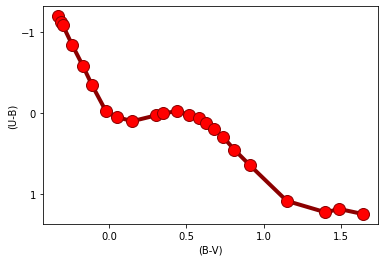

In [8]:
# 3) Diagrama color-color
import matplotlib.pyplot as plt

diagrama = pd.read_csv('V.dat', sep=" ", comment = '#')
#print(diagrama)

plt.plot( 'B-V', 'U-B', data=diagrama, 
         marker='o', markerfacecolor='red', markersize=12, color='darkred', linewidth=4)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.dpi'] = 50

plt.xlabel('(B-V)')
plt.ylabel('(U-B)')
plt.gca().invert_yaxis()
#plt.gca().set_aspect('equal')
plt.show()